In [ ]:
pip install catboost matplotlib scikit-learn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
from itertools import product

In [ ]:
drive.mount('/content/drive')
file_path = 'change to your xlsx file path'
df=pd.read_excel(file_path)

Mounted at /content/drive


In [ ]:
# 讀取與清洗資料
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,2022-07-31_subscribers,2022-07-31_views,2022-07-31_videos,2022-08-31_subscribers,2022-08-31_views,2022-08-31_videos,2022-09-30_subscribers,2022-09-30_views,2022-09-30_videos,2022-10-31_subscribers,2022-10-31_views,2022-10-31_videos,2022-11-30_subscribers,2022-11-30_views,2022-11-30_videos,2022-12-31_subscribers,2022-12-31_views,2022-12-31_videos,2023-01-31_subscribers,2023-01-31_views,2023-01-31_videos,2023-02-28_subscribers,2023-02-28_views,2023-02-28_videos,2023-03-31_subscribers,2023-03-31_views,2023-03-31_videos,2023-04-30_subscribers,2023-04-30_views,2023-04-30_videos,2023-05-31_subscribers,2023-05-31_views,2023-05-31_videos,2023-06-30_subscribers,2023-06-30_views,2023-06-30_videos,2023-07-31_subscribers,2023-07-31_views,2023-07-31_videos,2023-08-31_subscribers,2023-08-31_views,2023-08-31_videos,2023-09-30_subscribers,2023-09-30_views,2023-09-30_videos,2023-10-31_subscribers,2023-10-31_views,2023-10-31_videos,2023-11-30_subscribers,2023-11-30_views,2023-11-30_videos,2023-12-31_subscribers,2023-12-31_views,2023-12-31_videos,2024-01-31_subscribers,2024-01-31_views,2024-01-31_videos,2024-02-29_subscribers,2024-02-29_views,2024-02-29_videos,2024-03-31_subscribers,2024-03-31_views,2024-03-31_videos,2024-04-30_subscribers,2024-04-30_views,2024-04-30_videos,2024-05-31_subscribers,2024-05-31_views,2024-05-31_videos,2024-06-30_subscribers,2024-06-30_views,2024-06-30_videos,2024-07-31_subscribers,2024-07-31_views,2024-07-31_videos,2024-08-31_subscribers,2024-08-31_views,2024-08-31_videos,2024-09-30_subscribers,2024-09-30_views,2024-09-30_videos,2024-10-31_subscribers,2024-10-31_views,2024-10-31_videos,2024-11-30_subscribers,2024-11-30_views,2024-11-30_videos,2024-12-31_subscribers,2024-12-31_views,2024-12-31_videos,2025-01-31_subscribers,2025-01-31_views,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,9000.0,851623.0,0.0,8000.0,829334.0,0.0,15000.0,1550652.0,0.0,17000.0,1883207.0,0.0,9000.0,1147155.0,0.0,6000.0,736598.0,0.0,4000.0,631652.0,0.0,8000.0,959393.0,0.0,6000.0,812542.0,0.0,7000.0,819760.0,0.0,6000.0,911342.0,0.0,8000.0,947666.0,0.0,7000.0,957193.0,0.0,6000.0,939090.0,0.0,5000.0,736519.0,0.0,5000.0,715617.0,0.0,8000.0,928899.0,0.0,4000.0,650007.0,0.0,6000,722816,0,4000,673564,0,8000,910966,0,8000,971088,0,9000,1120878,0,9000,1071068,0,8000,1025816,0,6000,927436,0,7000,969709,0,8000,1120194,0,6000,949094,0,4000,803921,0,4000,560496,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,2200.0,500661.0,0.0,3000.0,527812.0,0.0,1900.0,425577.0,0.0,1700.0,333671.0,0.0,1000.0,219870.0,0.0,2500.0,640776.0,0.0,1000.0,452205.0,0.0,1100.0,238351.0,0.0,500.0,168256.0,0.0,200.0,98952.0,0.0,300.0,135590.0,0.0,1100.0,222253.0,0.0,1400.0,297008.0,0.0,600.0,199238.0,0.0,700.0,187539.0,0.0,1100.0,335613.0,0.0,600.0,231862.0,0.0,4600.0,1003726.0,0.0,1000,782362,0,1000,552882,0,600,416489,0,300,267133,0,1000,505849,0,800,378460,0,700,340314,0,200,141490,0,2300,470317,0,1700,685746,0,1100,558412,0,1600,663313,0,1900,941764,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,1500.0,163692.0,0.0,6300.0,705774.0,0.0,3600.0,490291.0,0.0,4900.0,566779.0,0.0,9700.0,1189408.0,0.0,5100.0,690908.0,0.0,1800.0,317501.0,0.0,5000.0,772872.0,0.0,1900.0,375826.0,0.0,5600.0,645163.0,0.0,4900.0,740054.0,0.0,4000.0,866524.0,0.0,2300.0,538702.0,0.0,14200.0,1890762.0,0.0,4700.0,934924.0,0.0,5500.0,1081550.0,0.0,4700.0,965015.0,0.0,3600.0,-625838.0,0.0,9000,1405841,0,6000,1202098,0,4000,980590,0,3000,832873,0,6000,1195562,0,7000,1381809,0,4000,1101828,0,6000,1053457

# 過去6個月

In [ ]:
# 步驟 1：擷取指定月份欄位
months = ['2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]
df = df.set_index('creator_handle')[columns_to_select]
df

,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,
tonyhuang38,2000,1173150,1000,842137,2000,1048496,2000,876428,2000.0,996573.0,4000,1386245,1000,989485
27apt,1100,545474,900,459120,600,323971,500,272594,1100.0,294622.0,3600,390896,4800,858483
campfiretw,1000,805787,2000,746875,1000,901167,2000,921321,2000.0,884778.0,2000,1118578,1000,795852
caitaitai945,1000,720591,1000,671684,2000,791143,2000,743683,1000.0,476800.0,1000,695216,4000,662498
keatfilms9821,2000,893064,0,494993,1000,526825,1000,704986,1000.0,794918.0,1000,1290174,1000,822440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,2000,404224,1000,362849,4000,604677,1000,342757,3000.0,442100.0,9000,980016,3000,616752
0323matzu,1500,331437,700,233127,600,216208,700,239653,700.0,-117759.0,500,232925,800,258863
theliupei,0,626635,0,348756,0,305338,0,-625891,0.0,344711.0,0,556965,0,453514


In [ ]:
# 步驟 2：標準化 subscribers/views 數據
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,
tonyhuang38,-0.131185,-0.070813,-0.423851,-0.129900,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.386005,-0.448825,-0.467410,-0.471617,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.414318,-0.292054,0.011742,-0.214890,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.414318,-0.343363,-0.423851,-0.281973,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.131185,-0.239492,-0.859444,-0.439612,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,-0.131185,-0.533892,-0.423851,-0.557507,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.272751,-0.577727,-0.554529,-0.673242,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.697451,-0.399947,-0.859444,-0.570081,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# 步驟 3：建立滑動視窗資料集 (前2個月作為歷史 + 後1個月為預測目標)
def generate_windowed_data(df_scaled, months):
  data = []
  for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]
    tmp = pd.DataFrame({
      '1st_Subscribers': df_scaled[f"{m1}_subscribers"],
      '1st_Views': df_scaled[f"{m1}_views"],
      '2nd_Subscribers': df_scaled[f"{m2}_subscribers"],
      '2nd_Views': df_scaled[f"{m2}_views"],
      'Subscribers': df_scaled[f"{m3}_subscribers"],
      'TargetMonth': m3
    }, index=df_scaled.index)
    data.append(tmp)
  return pd.concat(data)

dataset = generate_windowed_data(df_scaled, months)
print(dataset.shape)
display(dataset)

(345, 6)


,1st_Subscribers,1st_Views,2nd_Subscribers,2nd_Views,Subscribers,TargetMonth
creator_handle,,,,,,
tonyhuang38,-0.131185,-0.070813,-0.423851,-0.129900,-0.027411,2024-12-31
27apt,-0.386005,-0.448825,-0.467410,-0.471617,-0.443092,2024-12-31
campfiretw,-0.414318,-0.292054,0.011742,-0.214890,-0.324326,2024-12-31
caitaitai945,-0.414318,-0.343363,-0.423851,-0.281973,-0.027411,2024-12-31
keatfilms9821,-0.131185,-0.239492,-0.859444,-0.439612,-0.324326,2024-12-31
...,...,...,...,...,...,...
yuniquecc,0.551939,-0.370754,3.324463,-0.160810,0.342420,2025-04-30
0323matzu,-0.595163,-0.727708,-0.740749,-0.747123,-0.568380,2025-04-30
theliupei,-0.944281,-0.432847,-0.979879,-0.492818,-0.899580,2025-04-30


In [ ]:
# 步驟 4：分出訓練集、預測 2025-04-30 的測試集

pd.set_option('display.max_columns', None)     # 顯示所有欄位
pd.set_option('display.expand_frame_repr', False)  # 避免欄位換行顯示
pd.set_option('display.max_colwidth', None)    # 避免欄位內容被截斷
pd.set_option('display.width', 180)            # 顯示欄寬總寬度（可依螢幕調整）

train_data = dataset[dataset['TargetMonth'] != '2025-04-30']
predict_april_data = dataset[dataset['TargetMonth'] == '2025-04-30']

X = train_data[['1st_Views', '1st_Subscribers', '2nd_Views', '2nd_Subscribers']]
print("X.shape:",X.shape)
print("train_data:")
display(X.head(10))
y = train_data['Subscribers']
print("train_data_label:")
display(y.head(10))

X_april = predict_april_data[['1st_Views', '1st_Subscribers', '2nd_Views', '2nd_Subscribers']]
print("test_data:")
display(X_april.head(10))
y_april_true = predict_april_data['Subscribers']
print("test_data_label:")
display(y_april_true.head(10))

X.shape: (276, 4)
train_data:


,1st_Views,1st_Subscribers,2nd_Views,2nd_Subscribers
creator_handle,,,,
tonyhuang38,-0.070813,-0.131185,-0.129900,-0.423851
27apt,-0.448825,-0.386005,-0.471617,-0.467410
campfiretw,-0.292054,-0.414318,-0.214890,0.011742
caitaitai945,-0.343363,-0.414318,-0.281973,-0.423851
keatfilms9821,-0.239492,-0.131185,-0.439612,-0.859444
itravelgo,0.030044,-0.414318,-0.474300,-0.859444
deliciousthirsty,2.252493,1.794119,-2.609549,-0.598088
highaday,-0.100693,-0.697451,0.009356,-0.423851
zoebitalk,0.017538,0.435081,0.214430,0.011742


train_data_label:


,Subscribers
creator_handle,
tonyhuang38,-0.027411
27apt,-0.443092
campfiretw,-0.324326
caitaitai945,-0.027411
keatfilms9821,-0.324326
itravelgo,-0.621241
deliciousthirsty,-0.443092
highaday,-0.027411
zoebitalk,0.269504


test_data:


,1st_Views,1st_Subscribers,2nd_Views,2nd_Subscribers
creator_handle,,,,
tonyhuang38,-0.017234,0.053199,0.157997,0.933162
27apt,-0.464783,-0.395667,-0.623148,0.741858
campfiretw,-0.088512,0.053199,-0.052067,-0.023359
caitaitai945,-0.348630,-0.445541,-0.384319,-0.501619
keatfilms9821,-0.145805,-0.445541,0.082601,-0.501619
itravelgo,-0.542357,-0.944281,-0.785424,-1.458139
deliciousthirsty,0.112857,-0.694911,0.168734,-0.692923
highaday,0.040544,0.551939,0.081080,-0.023359
zoebitalk,0.503303,0.551939,-0.139340,-0.023359


test_data_label:


,Subscribers
creator_handle,
tonyhuang38,-0.48558
27apt,1.08762
campfiretw,-0.48558
caitaitai945,0.75642
keatfilms9821,-0.48558
itravelgo,-0.48558
deliciousthirsty,-0.77538
highaday,-0.48558
zoebitalk,0.34242


In [ ]:
# 步驟 5：分割訓練與測試集 (70/30)，並訓練CatBoost模型，並找出最佳參數組合。

## 切分資料（70% train, 30% test）
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## 參數組合清單
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.03, 0.06, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'iterations': [100, 150, 200]
}

best_score = -np.inf
best_params = None
best_model = None

## 使用for迴圈，尋找最佳參數組合，將最佳參數組合存入best model。
for depth, lr, reg, iters in product(param_grid['depth'],
                      param_grid['learning_rate'],
                      param_grid['l2_leaf_reg'],
                      param_grid['iterations']):
    model = CatBoostRegressor(
        depth=depth,
        learning_rate=lr,
        l2_leaf_reg=reg,
        iterations=iters,
        verbose=0,
        random_state=42
    )
    model.fit(X_train_final, y_train_final)
    y_test_pred = model.predict(X_test_final)
    r2 = r2_score(y_test_final, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test_final, y_test_pred))

    if r2 > best_score:
        best_score = r2
        best_params = {
            'depth': depth,
            'learning_rate': lr,
            'l2_leaf_reg': reg,
            'iterations': iters
        }
        best_model = model
        best_rmse_test = rmse_test

print("Best model")
print("最佳參數組合：", best_params)
print(f"Test R²： {best_score:.4f}")
print(f"Test RMSE: {best_rmse_test:.4f}")


Best model
最佳參數組合： {'depth': 8, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 100}
Test R²： 0.4470
Test RMSE: 0.8730


In [ ]:
# 步驟 6: 使用best model預測 4 月資料，並計算RMSE、R-square score。

y_april_pred = best_model.predict(X_april)
rmse_april = np.sqrt(mean_squared_error(y_april_true, y_april_pred))
r2_april = r2_score(y_april_true, y_april_pred)
print("成效評估 ：計算April的實際值與預測值的 RMSE 與 R-square score 。")
print(f"April RMSE: {rmse_april:.4f}")
print(f"April R² Score: {r2_april:.4f}")

成效評估 ：計算April的實際值與預測值的 RMSE 與 R-square score 。
April RMSE: 0.8558
April R² Score: 0.2676


nDCG

In [ ]:

# 將實際值與預測值轉為帶 creator index 的 Series
creator_april = predict_april_data.index
y_april_true_series = pd.Series(y_april_true, index=creator_april)
y_april_pred_series = pd.Series(y_april_pred, index=creator_april)

# Top-k 設定為前 10%
top_k = int(len(y_april_true_series) * 0.10)

# 取出真實與預測的前 top_k 名創作者 index
actual_top_indices = y_april_true_series.sort_values(ascending=False).head(top_k).index
predicted_top_indices = y_april_pred_series.sort_values(ascending=False).head(top_k).index

# 命中率計算
hit_count = len(set(actual_top_indices) & set(predicted_top_indices))
hit_rate = hit_count / top_k

# 定義 DCG 計算函數（使用真實觀看數作為 gain）
def dcg_score(y_true_series, y_pred_series, k):
    order = y_pred_series.sort_values(ascending=False).index[:k]
    y_true_at_k = y_true_series.loc[order].values
    gains = np.log1p(y_true_at_k)  # log(1 + gain) 防止大值主導
    discounts = np.log2(np.arange(2, k + 2))  # log2 折扣
    return np.sum(gains / discounts)

# 計算 DCG 與 ideal DCG，得到 nDCG
dcg = dcg_score(y_april_true_series, y_april_pred_series, top_k)
ideal_dcg = dcg_score(y_april_true_series, y_april_true_series, top_k)
ndcg = dcg / ideal_dcg if ideal_dcg != 0 else 0

# 輸出評估指標
print("\n📊 April 排名指標評估（前 10%）")
print(f"命中率 (HitRate): {hit_rate:.3f}")
print(f"標準化折扣累積增益 (nDCG): {ndcg:.3f}")


📊 April 排名指標評估（前 10%）
命中率 (HitRate): 0.333
標準化折扣累積增益 (nDCG): 0.585


## 匯出預測訂閱數欄位

In [ ]:
import pandas as pd
import os
from google.colab import drive

# 將其轉為 DataFrame 並重新命名欄位
df = y_april_pred_series.reset_index()
df.columns = ['creator_handle', 'score']

# Step 3: 根據 score 值由高到低排序
df_sorted = df.sort_values(by='score', ascending=False)

# Step 4: 設定輸出路徑（儲存在雲端硬碟中）
output_path = 'change to your path/april_cat6subscribers_predictions.xlsx'

# Step 5: 輸出為 Excel 檔案
df_sorted.to_excel(output_path, index=False)

# Step 6: 確認是否成功儲存
if os.path.exists(output_path):
    print(f"✅ 成功儲存到：{output_path}")
else:
    print("❌ 儲存失敗，請檢查路徑是否正確")


✅ 成功儲存到：/content/drive/MyDrive/機器學習小組/april_cat6subscribers_predictions.xlsx


##命中率、前10%是否良好指標分析

In [ ]:
# 潛力創作者名單與實際驗證 ===

# 把預測值加進 predict_april_data DataFrame 中
predict_april_data = predict_april_data.copy()
predict_april_data["PredictedSubscribers"] = y_april_pred

# 設定前 20% 門檻
top_k_percent = 0.2
top_n = int(len(predict_april_data) * top_k_percent)

# 取出預測值最高的前 20% 創作者
top_creators = predict_april_data.sort_values("PredictedSubscribers", ascending=False).head(top_n)

# 也抓出預測值最低的後 20% 作為對照組
bottom_creators = predict_april_data.sort_values("PredictedSubscribers", ascending=True).head(top_n)

# 計算實際訂閱數（標準化值）的平均
top_avg = top_creators["Subscribers"].mean()
bottom_avg = bottom_creators["Subscribers"].mean()
overall_avg = predict_april_data["Subscribers"].mean()

# 輸出分析結果
print("🔥 預測前 20% 創作者的平均實際訂閱數（標準化）:", round(top_avg, 3))
print("📉 預測後 20% 創作者的平均實際訂閱數:", round(bottom_avg, 3))
print("⚠️ 全體平均實際訂閱數:", round(overall_avg, 3))

# 顯示前幾名潛力創作者的預測與實際值
print("\n📋 前幾名潛力創作者（標準化值）:")
display(top_creators[["PredictedSubscribers", "Subscribers"]].head(10))


🔥 預測前 20% 創作者的平均實際訂閱數（標準化）: 0.852
📉 預測後 20% 創作者的平均實際訂閱數: -0.709
⚠️ 全體平均實際訂閱數: 0.0

📋 前幾名潛力創作者（標準化值）:


,PredictedSubscribers,Subscribers
creator_handle,,
rondoyoyo,2.250073,4.068419
celiamrg,1.465591,0.342420
kikitheblogger,1.131523,0.342420
yoshidajapantv,1.057330,0.342420
littlefilm33,0.901796,0.342420
ktstory,0.770168,1.998420
u1.yuitube,0.625295,0.342420
celineswaytravel,0.610671,0.756420
nowyouon,0.572784,1.584420


# 過去9個月

In [ ]:
# 讀取與清洗資料
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,2022-07-31_subscribers,2022-07-31_views,2022-07-31_videos,2022-08-31_subscribers,2022-08-31_views,2022-08-31_videos,2022-09-30_subscribers,2022-09-30_views,2022-09-30_videos,2022-10-31_subscribers,2022-10-31_views,2022-10-31_videos,2022-11-30_subscribers,2022-11-30_views,2022-11-30_videos,2022-12-31_subscribers,2022-12-31_views,2022-12-31_videos,2023-01-31_subscribers,2023-01-31_views,2023-01-31_videos,2023-02-28_subscribers,2023-02-28_views,2023-02-28_videos,2023-03-31_subscribers,2023-03-31_views,2023-03-31_videos,2023-04-30_subscribers,2023-04-30_views,2023-04-30_videos,2023-05-31_subscribers,2023-05-31_views,2023-05-31_videos,2023-06-30_subscribers,2023-06-30_views,2023-06-30_videos,2023-07-31_subscribers,2023-07-31_views,2023-07-31_videos,2023-08-31_subscribers,2023-08-31_views,2023-08-31_videos,2023-09-30_subscribers,2023-09-30_views,2023-09-30_videos,2023-10-31_subscribers,2023-10-31_views,2023-10-31_videos,2023-11-30_subscribers,2023-11-30_views,2023-11-30_videos,2023-12-31_subscribers,2023-12-31_views,2023-12-31_videos,2024-01-31_subscribers,2024-01-31_views,2024-01-31_videos,2024-02-29_subscribers,2024-02-29_views,2024-02-29_videos,2024-03-31_subscribers,2024-03-31_views,2024-03-31_videos,2024-04-30_subscribers,2024-04-30_views,2024-04-30_videos,2024-05-31_subscribers,2024-05-31_views,2024-05-31_videos,2024-06-30_subscribers,2024-06-30_views,2024-06-30_videos,2024-07-31_subscribers,2024-07-31_views,2024-07-31_videos,2024-08-31_subscribers,2024-08-31_views,2024-08-31_videos,2024-09-30_subscribers,2024-09-30_views,2024-09-30_videos,2024-10-31_subscribers,2024-10-31_views,2024-10-31_videos,2024-11-30_subscribers,2024-11-30_views,2024-11-30_videos,2024-12-31_subscribers,2024-12-31_views,2024-12-31_videos,2025-01-31_subscribers,2025-01-31_views,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,9000.0,851623.0,0.0,8000.0,829334.0,0.0,15000.0,1550652.0,0.0,17000.0,1883207.0,0.0,9000.0,1147155.0,0.0,6000.0,736598.0,0.0,4000.0,631652.0,0.0,8000.0,959393.0,0.0,6000.0,812542.0,0.0,7000.0,819760.0,0.0,6000.0,911342.0,0.0,8000.0,947666.0,0.0,7000.0,957193.0,0.0,6000.0,939090.0,0.0,5000.0,736519.0,0.0,5000.0,715617.0,0.0,8000.0,928899.0,0.0,4000.0,650007.0,0.0,6000,722816,0,4000,673564,0,8000,910966,0,8000,971088,0,9000,1120878,0,9000,1071068,0,8000,1025816,0,6000,927436,0,7000,969709,0,8000,1120194,0,6000,949094,0,4000,803921,0,4000,560496,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,2200.0,500661.0,0.0,3000.0,527812.0,0.0,1900.0,425577.0,0.0,1700.0,333671.0,0.0,1000.0,219870.0,0.0,2500.0,640776.0,0.0,1000.0,452205.0,0.0,1100.0,238351.0,0.0,500.0,168256.0,0.0,200.0,98952.0,0.0,300.0,135590.0,0.0,1100.0,222253.0,0.0,1400.0,297008.0,0.0,600.0,199238.0,0.0,700.0,187539.0,0.0,1100.0,335613.0,0.0,600.0,231862.0,0.0,4600.0,1003726.0,0.0,1000,782362,0,1000,552882,0,600,416489,0,300,267133,0,1000,505849,0,800,378460,0,700,340314,0,200,141490,0,2300,470317,0,1700,685746,0,1100,558412,0,1600,663313,0,1900,941764,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,1500.0,163692.0,0.0,6300.0,705774.0,0.0,3600.0,490291.0,0.0,4900.0,566779.0,0.0,9700.0,1189408.0,0.0,5100.0,690908.0,0.0,1800.0,317501.0,0.0,5000.0,772872.0,0.0,1900.0,375826.0,0.0,5600.0,645163.0,0.0,4900.0,740054.0,0.0,4000.0,866524.0,0.0,2300.0,538702.0,0.0,14200.0,1890762.0,0.0,4700.0,934924.0,0.0,5500.0,1081550.0,0.0,4700.0,965015.0,0.0,3600.0,-625838.0,0.0,9000,1405841,0,6000,1202098,0,4000,980590,0,3000,832873,0,6000,1195562,0,7000,1381809,0,4000,1101828,0,6000,1053457

In [ ]:
# 步驟 1：擷取指定月份欄位
months = ['2024-07-31','2024-08-31','2024-09-30','2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]
df = df.set_index('creator_handle')[columns_to_select]
df

,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,2024-09-30_subscribers,2024-09-30_views,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,
tonyhuang38,2000,991758,2000,894392,1000,860078,2000,1173150,1000,842137,2000,1048496,2000,876428,2000.0,996573.0,4000,1386245,1000,989485
27apt,1200,633065,1700,503433,800,467973,1100,545474,900,459120,600,323971,500,272594,1100.0,294622.0,3600,390896,4800,858483
campfiretw,1000,737051,1000,580588,1000,669176,1000,805787,2000,746875,1000,901167,2000,921321,2000.0,884778.0,2000,1118578,1000,795852
caitaitai945,1000,418324,1000,360793,3000,963474,1000,720591,1000,671684,2000,791143,2000,743683,1000.0,476800.0,1000,695216,4000,662498
keatfilms9821,1000,1109007,1000,865679,1000,765203,2000,893064,0,494993,1000,526825,1000,704986,1000.0,794918.0,1000,1290174,1000,822440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,2000,382466,3000,692321,3000,480601,2000,404224,1000,362849,4000,604677,1000,342757,3000.0,442100.0,9000,980016,3000,616752
0323matzu,500,246380,900,253562,800,215720,1500,331437,700,233127,600,216208,700,239653,700.0,-117759.0,500,232925,800,258863
theliupei,0,721623,0,785773,0,568803,0,626635,0,348756,0,305338,0,-625891,0.0,344711.0,0,556965,0,453514


In [ ]:
# 步驟 2：標準化 subscribers/views 數據
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,2024-09-30_subscribers,2024-09-30_views,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,
tonyhuang38,-0.186145,-0.011904,-0.149731,-0.123931,-0.429349,-0.073595,-0.131185,-0.070813,-0.423851,-0.129900,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.380862,-0.109438,-0.184032,-0.178069,-0.516443,-0.235019,-0.386005,-0.448825,-0.467410,-0.471617,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.429541,-0.081162,-0.264068,-0.167385,-0.429349,-0.152187,-0.414318,-0.292054,0.011742,-0.214890,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.429541,-0.167829,-0.264068,-0.197820,0.441592,-0.031028,-0.414318,-0.343363,-0.423851,-0.281973,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.429541,0.019978,-0.264068,-0.127907,-0.429349,-0.112654,-0.131185,-0.239492,-0.859444,-0.439612,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,-0.186145,-0.177579,-0.035395,-0.151913,0.441592,-0.229820,-0.131185,-0.533892,-0.423851,-0.557507,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.551239,-0.214583,-0.275501,-0.212669,-0.516443,-0.338868,-0.272751,-0.577727,-0.554529,-0.673242,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.672937,-0.085358,-0.378404,-0.138972,-0.864819,-0.193509,-0.697451,-0.399947,-0.859444,-0.570081,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# 步驟 3：建立滑動視窗資料集 (前2個月作為歷史 + 後1個月為預測目標)
def generate_windowed_data(df_scaled, months):
  data = []
  for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]
    tmp = pd.DataFrame({
      '1st_Subscribers': df_scaled[f"{m1}_subscribers"],
      '1st_Views': df_scaled[f"{m1}_views"],
      '2nd_Subscribers': df_scaled[f"{m2}_subscribers"],
      '2nd_Views': df_scaled[f"{m2}_views"],
      'Subscribers': df_scaled[f"{m3}_subscribers"],
      'TargetMonth': m3
    }, index=df_scaled.index)
    data.append(tmp)
  return pd.concat(data)

dataset = generate_windowed_data(df_scaled, months)
print(dataset.shape)
display(dataset)

(552, 6)


,1st_Subscribers,1st_Views,2nd_Subscribers,2nd_Views,Subscribers,TargetMonth
creator_handle,,,,,,
tonyhuang38,-0.186145,-0.011904,-0.149731,-0.123931,-0.429349,2024-09-30
27apt,-0.380862,-0.109438,-0.184032,-0.178069,-0.516443,2024-09-30
campfiretw,-0.429541,-0.081162,-0.264068,-0.167385,-0.429349,2024-09-30
caitaitai945,-0.429541,-0.167829,-0.264068,-0.197820,0.441592,2024-09-30
keatfilms9821,-0.429541,0.019978,-0.264068,-0.127907,-0.429349,2024-09-30
...,...,...,...,...,...,...
yuniquecc,0.551939,-0.370754,3.324463,-0.160810,0.342420,2025-04-30
0323matzu,-0.595163,-0.727708,-0.740749,-0.747123,-0.568380,2025-04-30
theliupei,-0.944281,-0.432847,-0.979879,-0.492818,-0.899580,2025-04-30


In [ ]:
# 步驟 4：分出訓練集、預測 2025-04-30 的測試集

pd.set_option('display.max_columns', None)     # 顯示所有欄位
pd.set_option('display.expand_frame_repr', False)  # 避免欄位換行顯示
pd.set_option('display.max_colwidth', None)    # 避免欄位內容被截斷
pd.set_option('display.width', 180)            # 顯示欄寬總寬度（可依螢幕調整）

train_data = dataset[dataset['TargetMonth'] != '2025-04-30']
predict_april_data = dataset[dataset['TargetMonth'] == '2025-04-30']

X = train_data[['1st_Views', '1st_Subscribers', '2nd_Views', '2nd_Subscribers']]
print("X.shape:",X.shape)
print("train_data:")
display(X.head(10))
y = train_data['Subscribers']
print("train_data_label:")
display(y.head(10))

X_april = predict_april_data[['1st_Views', '1st_Subscribers', '2nd_Views', '2nd_Subscribers']]
print("test_data:")
display(X_april.head(10))
y_april_true = predict_april_data['Subscribers']
print("test_data_label:")
display(y_april_true.head(10))

X.shape: (483, 4)
train_data:


,1st_Views,1st_Subscribers,2nd_Views,2nd_Subscribers
creator_handle,,,,
tonyhuang38,-0.011904,-0.186145,-0.123931,-0.149731
27apt,-0.109438,-0.380862,-0.178069,-0.184032
campfiretw,-0.081162,-0.429541,-0.167385,-0.264068
caitaitai945,-0.167829,-0.429541,-0.197820,-0.264068
keatfilms9821,0.019978,-0.429541,-0.127907,-0.264068
itravelgo,0.000357,-0.672937,-0.184558,-0.378404
deliciousthirsty,-0.033135,-0.575579,-0.125017,-0.332670
highaday,-0.011023,-0.186145,-0.055948,-0.378404
zoebitalk,-0.030752,0.057251,-0.116435,-0.264068


train_data_label:


,Subscribers
creator_handle,
tonyhuang38,-0.429349
27apt,-0.516443
campfiretw,-0.429349
caitaitai945,0.441592
keatfilms9821,-0.429349
itravelgo,-0.429349
deliciousthirsty,-0.516443
highaday,-0.429349
zoebitalk,0.877063


test_data:


,1st_Views,1st_Subscribers,2nd_Views,2nd_Subscribers
creator_handle,,,,
tonyhuang38,-0.017234,0.053199,0.157997,0.933162
27apt,-0.464783,-0.395667,-0.623148,0.741858
campfiretw,-0.088512,0.053199,-0.052067,-0.023359
caitaitai945,-0.348630,-0.445541,-0.384319,-0.501619
keatfilms9821,-0.145805,-0.445541,0.082601,-0.501619
itravelgo,-0.542357,-0.944281,-0.785424,-1.458139
deliciousthirsty,0.112857,-0.694911,0.168734,-0.692923
highaday,0.040544,0.551939,0.081080,-0.023359
zoebitalk,0.503303,0.551939,-0.139340,-0.023359


test_data_label:


,Subscribers
creator_handle,
tonyhuang38,-0.48558
27apt,1.08762
campfiretw,-0.48558
caitaitai945,0.75642
keatfilms9821,-0.48558
itravelgo,-0.48558
deliciousthirsty,-0.77538
highaday,-0.48558
zoebitalk,0.34242


In [ ]:
# 步驟 5：分割訓練與測試集 (70/30)，並訓練CatBoost模型，並找出最佳參數組合。

## 切分資料（70% train, 30% test）
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## 參數組合清單
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.03, 0.06, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'iterations': [100, 150, 200]
}

best_score = -np.inf
best_params = None
best_model = None

## 使用for迴圈，尋找最佳參數組合，將最佳參數組合存入best model。
for depth, lr, reg, iters in product(param_grid['depth'],
                      param_grid['learning_rate'],
                      param_grid['l2_leaf_reg'],
                      param_grid['iterations']):
    model = CatBoostRegressor(
        depth=depth,
        learning_rate=lr,
        l2_leaf_reg=reg,
        iterations=iters,
        verbose=0,
        random_state=42
    )
    model.fit(X_train_final, y_train_final)
    y_test_pred = model.predict(X_test_final)
    r2 = r2_score(y_test_final, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test_final, y_test_pred))

    if r2 > best_score:
        best_score = r2
        best_params = {
            'depth': depth,
            'learning_rate': lr,
            'l2_leaf_reg': reg,
            'iterations': iters
        }
        best_model = model
        best_rmse_test = rmse_test

print("Best model")
print("最佳參數組合：", best_params)
print(f"Test R²： {best_score:.4f}")
print(f"Test RMSE: {best_rmse_test:.4f}")


In [ ]:
# 步驟 6: 使用best model預測 4 月資料，並計算RMSE、R-square score。

y_april_pred = best_model.predict(X_april)
rmse_april = np.sqrt(mean_squared_error(y_april_true, y_april_pred))
r2_april = r2_score(y_april_true, y_april_pred)
print("成效評估 ：計算April的實際值與預測值的 RMSE 與 R-square score 。")
print(f"April RMSE: {rmse_april:.4f}")
print(f"April R² Score: {r2_april:.4f}")

成效評估 ：計算April的實際值與預測值的 RMSE 與 R-square score 。
April RMSE: 0.7245
April R² Score: 0.4751


nDCG

In [ ]:

# 將實際值與預測值轉為帶 creator index 的 Series
creator_april = predict_april_data.index
y_april_true_series = pd.Series(y_april_true, index=creator_april)
y_april_pred_series = pd.Series(y_april_pred, index=creator_april)

# Top-k 設定為前 10%
top_k = int(len(y_april_true_series) * 0.10)

# 取出真實與預測的前 top_k 名創作者 index
actual_top_indices = y_april_true_series.sort_values(ascending=False).head(top_k).index
predicted_top_indices = y_april_pred_series.sort_values(ascending=False).head(top_k).index

# 命中率計算
hit_count = len(set(actual_top_indices) & set(predicted_top_indices))
hit_rate = hit_count / top_k

# 定義 DCG 計算函數（使用真實觀看數作為 gain）
def dcg_score(y_true_series, y_pred_series, k):
    order = y_pred_series.sort_values(ascending=False).index[:k]
    y_true_at_k = y_true_series.loc[order].values
    gains = np.log1p(y_true_at_k)  # log(1 + gain) 防止大值主導
    discounts = np.log2(np.arange(2, k + 2))  # log2 折扣
    return np.sum(gains / discounts)

# 計算 DCG 與 ideal DCG，得到 nDCG
dcg = dcg_score(y_april_true_series, y_april_pred_series, top_k)
ideal_dcg = dcg_score(y_april_true_series, y_april_true_series, top_k)
ndcg = dcg / ideal_dcg if ideal_dcg != 0 else 0

# 輸出評估指標
print("\n📊 April 排名指標評估（前 10%）")
print(f"命中率 (HitRate): {hit_rate:.3f}")
print(f"標準化折扣累積增益 (nDCG): {ndcg:.3f}")


📊 April 排名指標評估（前 10%）
命中率 (HitRate): 0.667
標準化折扣累積增益 (nDCG): 0.785


## 匯出預測訂閱數欄位

In [ ]:
import pandas as pd
import os
from google.colab import drive

# 將其轉為 DataFrame 並重新命名欄位
df = y_april_pred_series.reset_index()
df.columns = ['creator_handle', 'score']

# Step 3: 根據 score 值由高到低排序
df_sorted = df.sort_values(by='score', ascending=False)

# Step 4: 設定輸出路徑（儲存在雲端硬碟中）
output_path = 'change to your path/april_cat9subscribers_predictions.xlsx'

# Step 5: 輸出為 Excel 檔案
df_sorted.to_excel(output_path, index=False)

# Step 6: 確認是否成功儲存
if os.path.exists(output_path):
    print(f"✅ 成功儲存到：{output_path}")
else:
    print("❌ 儲存失敗，請檢查路徑是否正確")


✅ 成功儲存到：/content/drive/MyDrive/機器學習小組/april_cat9subscribers_predictions.xlsx


##命中率、前10%是否良好指標分析

In [ ]:
# 潛力創作者名單與實際驗證 ===

# 把預測值加進 predict_april_data DataFrame 中
predict_april_data = predict_april_data.copy()
predict_april_data["PredictedSubscribers"] = y_april_pred

# 設定前 20% 門檻
top_k_percent = 0.2
top_n = int(len(predict_april_data) * top_k_percent)

# 取出預測值最高的前 20% 創作者
top_creators = predict_april_data.sort_values("PredictedSubscribers", ascending=False).head(top_n)

# 也抓出預測值最低的後 20% 作為對照組
bottom_creators = predict_april_data.sort_values("PredictedSubscribers", ascending=True).head(top_n)

# 計算實際訂閱數（標準化值）的平均
top_avg = top_creators["Subscribers"].mean()
bottom_avg = bottom_creators["Subscribers"].mean()
overall_avg = predict_april_data["Subscribers"].mean()

# 輸出分析結果
print("🔥 預測前 20% 創作者的平均實際訂閱數（標準化）:", round(top_avg, 3))
print("📉 預測後 20% 創作者的平均實際訂閱數:", round(bottom_avg, 3))
print("⚠️ 全體平均實際訂閱數:", round(overall_avg, 3))

# 顯示前幾名潛力創作者的預測與實際值
print("\n📋 前幾名潛力創作者（標準化值）:")
display(top_creators[["PredictedSubscribers", "Subscribers"]].head(10))


🔥 預測前 20% 創作者的平均實際訂閱數（標準化）: 1.148
📉 預測後 20% 創作者的平均實際訂閱數: -0.592
⚠️ 全體平均實際訂閱數: 0.0

📋 前幾名潛力創作者（標準化值）:


,PredictedSubscribers,Subscribers
creator_handle,,
rondoyoyo,3.232911,4.068419
ktstory,1.418051,1.998420
yoshidajapantv,0.692843,0.342420
terry-films,0.665686,3.240419
nowyouon,0.643553,1.584420
gloryandy,0.598731,0.052620
nene0711,0.583630,0.342420
yuniquecc,0.540673,0.342420
kikitheblogger,0.456168,0.342420


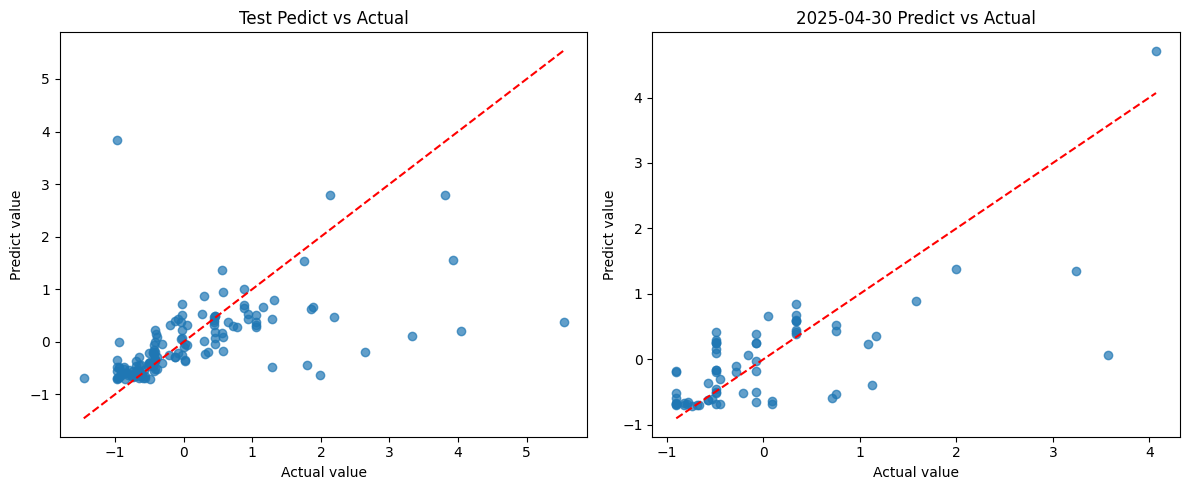

In [ ]:
# === 步驟 9：繪製預測 vs 實際 圖表 ===

'''plt.figure(figsize=(12, 5))

# 測試集圖
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Test Pedict vs Actual")
plt.xlabel("Actual value")
plt.ylabel("Predict value")

# 四月預測圖
plt.subplot(1, 2, 2)
plt.scatter(y_april_true, y_april_pred, alpha=0.7)
plt.plot([y_april_true.min(), y_april_true.max()], [y_april_true.min(), y_april_true.max()], 'r--')
plt.title("2025-04-30 Predict vs Actual")
plt.xlabel("Actual value")
plt.ylabel("Predict value")

plt.tight_layout()
plt.show()'''

In [ ]:
# 標準化反轉函數
def inverse_transform_subscribers(series, column_name):
    col_idx = list(df.columns).index(column_name)
    return series * scaler.scale_[col_idx] + scaler.mean_[col_idx]

In [ ]:
# Test 創作者名稱（X_test 的索引即為 creator_handle）
X_test_creators = X_test.index

# 查該批測試樣本的實際目標月份
target_month_test = train_data.loc[X_test_creators, 'TargetMonth'].iloc[0]
target_col_test = f"{target_month_test}_subscribers"

# 反轉標準化
y_test_actual = inverse_transform_subscribers(y_test, target_col_test)
y_test_pred_actual = inverse_transform_subscribers(pd.Series(y_test_pred, index=X_test_creators), target_col_test)
test_errors = (y_test_actual - y_test_pred_actual).abs()

# 組成表格（創作者、實際值、預測值、誤差）
test_error_df = pd.DataFrame({
    'creator_handle': X_test_creators,
    'actual_subscribers': y_test_actual,
    'predicted_subscribers': y_test_pred_actual,
    'error': test_errors
}).reset_index(drop=True).sort_values(by='error', ascending=False).head(10)

print("\n測試集預測誤差最大前 10 位創作者")
display(
    test_error_df.style.format({
        'actual_subscribers': '{:,.0f}',
        'predicted_subscribers': '{:,.0f}',
        'error': '{:,.0f}'
    })
)


# 四月預測創作者
X_april_creators = X_april.index
y_april_actual = inverse_transform_subscribers(y_april_true, '2025-04-30_subscribers')
y_april_pred_actual = inverse_transform_subscribers(pd.Series(y_april_pred, index=X_april_creators), '2025-04-30_subscribers')
april_errors = (y_april_actual - y_april_pred_actual).abs()

april_error_df = pd.DataFrame({
    'creator_handle': X_april_creators,
    'actual_subscribers': y_april_actual,
    'predicted_subscribers': y_april_pred_actual,
    'error': april_errors
}).reset_index(drop=True).sort_values(by='error', ascending=False).head(10)

print("\n2025-04-30 預測誤差最大前 10 位創作者")
display(
    april_error_df.style.format({
        'actual_subscribers': '{:,.0f}',
        'predicted_subscribers': '{:,.0f}',
        'error': '{:,.0f}'
    })
)


測試集預測誤差最大前 10 位創作者


,creator_handle,actual_subscribers,predicted_subscribers,error
61,rondoyoyo,"14,703","2,850","11,853"
143,terry-films,-264,"10,786","11,050"
86,terry-films,"11,270","2,459","8,811"
8,yuniquecc,"9,620","2,232","7,388"
18,rondoyoyo,"8,059","1,515","6,544"
112,6artstv,"6,545",516,"6,029"
24,ktstory,"11,000","5,542","5,458"
83,deliciousthirsty,"6,106",954,"5,152"
132,smilevlogtaiwan,"4,936",863,"4,073"
52,kikitheblogger,"7,014","3,086","3,928"



2025-04-30 預測誤差最大前 10 位創作者


,creator_handle,actual_subscribers,predicted_subscribers,error
11,6artstv,"10,800","2,340","8,460"
32,terry-films,"10,000","5,445","4,555"
42,hard2men1213,"4,900","1,237","3,663"
39,just_be_joyce,"3,900",761,"3,139"
3,caitaitai945,"4,000",887,"3,113"
0,tonyhuang38,"1,000","3,181","2,181"
1,27apt,"4,800","2,727","2,073"
34,蔡淘貴,"5,000","3,046","1,954"
7,highaday,"1,000","2,893","1,893"
17,阿杰趴趴go,"2,400",526,"1,874"


#過去12個月

In [ ]:
# 讀取與清洗資料
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,2022-07-31_subscribers,2022-07-31_views,2022-07-31_videos,2022-08-31_subscribers,2022-08-31_views,2022-08-31_videos,2022-09-30_subscribers,2022-09-30_views,2022-09-30_videos,2022-10-31_subscribers,2022-10-31_views,2022-10-31_videos,2022-11-30_subscribers,2022-11-30_views,2022-11-30_videos,2022-12-31_subscribers,2022-12-31_views,2022-12-31_videos,2023-01-31_subscribers,2023-01-31_views,2023-01-31_videos,2023-02-28_subscribers,2023-02-28_views,2023-02-28_videos,2023-03-31_subscribers,2023-03-31_views,2023-03-31_videos,2023-04-30_subscribers,2023-04-30_views,2023-04-30_videos,2023-05-31_subscribers,2023-05-31_views,2023-05-31_videos,2023-06-30_subscribers,2023-06-30_views,2023-06-30_videos,2023-07-31_subscribers,2023-07-31_views,2023-07-31_videos,2023-08-31_subscribers,2023-08-31_views,2023-08-31_videos,2023-09-30_subscribers,2023-09-30_views,2023-09-30_videos,2023-10-31_subscribers,2023-10-31_views,2023-10-31_videos,2023-11-30_subscribers,2023-11-30_views,2023-11-30_videos,2023-12-31_subscribers,2023-12-31_views,2023-12-31_videos,2024-01-31_subscribers,2024-01-31_views,2024-01-31_videos,2024-02-29_subscribers,2024-02-29_views,2024-02-29_videos,2024-03-31_subscribers,2024-03-31_views,2024-03-31_videos,2024-04-30_subscribers,2024-04-30_views,2024-04-30_videos,2024-05-31_subscribers,2024-05-31_views,2024-05-31_videos,2024-06-30_subscribers,2024-06-30_views,2024-06-30_videos,2024-07-31_subscribers,2024-07-31_views,2024-07-31_videos,2024-08-31_subscribers,2024-08-31_views,2024-08-31_videos,2024-09-30_subscribers,2024-09-30_views,2024-09-30_videos,2024-10-31_subscribers,2024-10-31_views,2024-10-31_videos,2024-11-30_subscribers,2024-11-30_views,2024-11-30_videos,2024-12-31_subscribers,2024-12-31_views,2024-12-31_videos,2025-01-31_subscribers,2025-01-31_views,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,9000.0,851623.0,0.0,8000.0,829334.0,0.0,15000.0,1550652.0,0.0,17000.0,1883207.0,0.0,9000.0,1147155.0,0.0,6000.0,736598.0,0.0,4000.0,631652.0,0.0,8000.0,959393.0,0.0,6000.0,812542.0,0.0,7000.0,819760.0,0.0,6000.0,911342.0,0.0,8000.0,947666.0,0.0,7000.0,957193.0,0.0,6000.0,939090.0,0.0,5000.0,736519.0,0.0,5000.0,715617.0,0.0,8000.0,928899.0,0.0,4000.0,650007.0,0.0,6000,722816,0,4000,673564,0,8000,910966,0,8000,971088,0,9000,1120878,0,9000,1071068,0,8000,1025816,0,6000,927436,0,7000,969709,0,8000,1120194,0,6000,949094,0,4000,803921,0,4000,560496,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,2200.0,500661.0,0.0,3000.0,527812.0,0.0,1900.0,425577.0,0.0,1700.0,333671.0,0.0,1000.0,219870.0,0.0,2500.0,640776.0,0.0,1000.0,452205.0,0.0,1100.0,238351.0,0.0,500.0,168256.0,0.0,200.0,98952.0,0.0,300.0,135590.0,0.0,1100.0,222253.0,0.0,1400.0,297008.0,0.0,600.0,199238.0,0.0,700.0,187539.0,0.0,1100.0,335613.0,0.0,600.0,231862.0,0.0,4600.0,1003726.0,0.0,1000,782362,0,1000,552882,0,600,416489,0,300,267133,0,1000,505849,0,800,378460,0,700,340314,0,200,141490,0,2300,470317,0,1700,685746,0,1100,558412,0,1600,663313,0,1900,941764,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,1500.0,163692.0,0.0,6300.0,705774.0,0.0,3600.0,490291.0,0.0,4900.0,566779.0,0.0,9700.0,1189408.0,0.0,5100.0,690908.0,0.0,1800.0,317501.0,0.0,5000.0,772872.0,0.0,1900.0,375826.0,0.0,5600.0,645163.0,0.0,4900.0,740054.0,0.0,4000.0,866524.0,0.0,2300.0,538702.0,0.0,14200.0,1890762.0,0.0,4700.0,934924.0,0.0,5500.0,1081550.0,0.0,4700.0,965015.0,0.0,3600.0,-625838.0,0.0,9000,1405841,0,6000,1202098,0,4000,980590,0,3000,832873,0,6000,1195562,0,7000,1381809,0,4000,1101828,0,6000,1053457

In [ ]:
# 步驟 1：擷取指定月份欄位
months = ['2024-04-30','2024-05-31','2024-06-30','2024-07-31','2024-08-31','2024-09-30','2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30']
metrics = ['subscribers', 'views']
columns_to_select = [f"{month}_{metric}" for month in months for metric in metrics]

df = df.set_index('creator_handle')[columns_to_select]
df

,2024-04-30_subscribers,2024-04-30_views,2024-05-31_subscribers,2024-05-31_views,2024-06-30_subscribers,2024-06-30_views,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,2024-09-30_subscribers,2024-09-30_views,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,,,,,,,
tonyhuang38,3000,1265214,2000,1231154,4000,1447236,2000,991758,2000,894392,1000,860078,2000,1173150,1000,842137,2000,1048496,2000,876428,2000.0,996573.0,4000,1386245,1000,989485
27apt,700,328885,1100,502659,1400,649359,1200,633065,1700,503433,800,467973,1100,545474,900,459120,600,323971,500,272594,1100.0,294622.0,3600,390896,4800,858483
campfiretw,0,609998,2000,619214,1000,644864,1000,737051,1000,580588,1000,669176,1000,805787,2000,746875,1000,901167,2000,921321,2000.0,884778.0,2000,1118578,1000,795852
caitaitai945,1000,678782,1000,516446,1000,597046,1000,418324,1000,360793,3000,963474,1000,720591,1000,671684,2000,791143,2000,743683,1000.0,476800.0,1000,695216,4000,662498
keatfilms9821,2000,1676109,2000,887819,2000,1179563,1000,1109007,1000,865679,1000,765203,2000,893064,0,494993,1000,526825,1000,704986,1000.0,794918.0,1000,1290174,1000,822440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,2600,-83502,3100,438050,3300,616071,2000,382466,3000,692321,3000,480601,2000,404224,1000,362849,4000,604677,1000,342757,3000.0,442100.0,9000,980016,3000,616752
0323matzu,900,466128,1100,450602,800,332796,500,246380,900,253562,800,215720,1500,331437,700,233127,600,216208,700,239653,700.0,-117759.0,500,232925,800,258863
theliupei,0,974311,0,495264,0,336247,0,721623,0,785773,0,568803,0,626635,0,348756,0,305338,0,-625891,0.0,344711.0,0,556965,0,453514


In [ ]:
# 步驟 2：標準化 subscribers/views 數據
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled

,2024-04-30_subscribers,2024-04-30_views,2024-05-31_subscribers,2024-05-31_views,2024-06-30_subscribers,2024-06-30_views,2024-07-31_subscribers,2024-07-31_views,2024-08-31_subscribers,2024-08-31_views,2024-09-30_subscribers,2024-09-30_views,2024-10-31_subscribers,2024-10-31_views,2024-11-30_subscribers,2024-11-30_views,2024-12-31_subscribers,2024-12-31_views,2025-01-31_subscribers,2025-01-31_views,2025-02-28_subscribers,2025-02-28_views,2025-03-31_subscribers,2025-03-31_views,2025-04-30_subscribers,2025-04-30_views
creator_handle,,,,,,,,,,,,,,,,,,,,,,,,,,
tonyhuang38,0.157156,0.044886,-0.206289,-0.045368,0.241254,0.040374,-0.186145,-0.011904,-0.149731,-0.123931,-0.429349,-0.073595,-0.131185,-0.070813,-0.423851,-0.129900,-0.027411,-0.047798,-0.046589,-0.163217,0.053199,-0.017234,0.933162,0.157997,-0.48558,-0.187485
27apt,-0.474412,-0.613628,-0.466983,-0.404736,-0.349774,-0.332434,-0.380862,-0.109438,-0.184032,-0.178069,-0.516443,-0.235019,-0.386005,-0.448825,-0.467410,-0.471617,-0.443092,-0.483486,-0.570148,-0.397551,-0.395667,-0.464783,0.741858,-0.623148,1.08762,-0.239236
campfiretw,-0.666629,-0.415923,-0.206289,-0.347239,-0.440702,-0.334534,-0.429541,-0.081162,-0.264068,-0.167385,-0.429349,-0.152187,-0.414318,-0.292054,0.011742,-0.214890,-0.324326,-0.136393,-0.046589,-0.145795,0.053199,-0.088512,-0.023359,-0.052067,-0.48558,-0.263978
caitaitai945,-0.392034,-0.367548,-0.495949,-0.397935,-0.440702,-0.356877,-0.429541,-0.167829,-0.264068,-0.197820,0.441592,-0.031028,-0.414318,-0.343363,-0.423851,-0.281973,-0.027411,-0.202556,-0.046589,-0.214732,-0.445541,-0.348630,-0.501619,-0.384319,0.75642,-0.316659
keatfilms9821,-0.117439,0.333865,-0.206289,-0.214736,-0.213383,-0.084696,-0.429541,0.019978,-0.264068,-0.127907,-0.429349,-0.112654,-0.131185,-0.239492,-0.859444,-0.439612,-0.324326,-0.361502,-0.395628,-0.229750,-0.445541,-0.145805,-0.501619,0.082601,-0.48558,-0.253475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuniquecc,0.047318,-0.903657,0.112338,-0.436608,0.082131,-0.347988,-0.186145,-0.177579,-0.035395,-0.151913,0.441592,-0.229820,-0.131185,-0.533892,-0.423851,-0.557507,0.566420,-0.314686,-0.395628,-0.370323,0.551939,-0.370754,3.324463,-0.160810,0.34242,-0.334731
0323matzu,-0.419493,-0.517106,-0.466983,-0.430416,-0.486165,-0.480348,-0.551239,-0.214583,-0.275501,-0.212669,-0.516443,-0.338868,-0.272751,-0.577727,-0.554529,-0.673242,-0.443092,-0.548289,-0.500340,-0.410335,-0.595163,-0.727708,-0.740749,-0.747123,-0.56838,-0.476113
theliupei,-0.666629,-0.159704,-0.785609,-0.408384,-0.668020,-0.478735,-0.672937,-0.085358,-0.378404,-0.138972,-0.864819,-0.193509,-0.697451,-0.399947,-0.859444,-0.570081,-0.621241,-0.494691,-0.744668,-0.746234,-0.944281,-0.432847,-0.979879,-0.492818,-0.89958,-0.399217


In [ ]:
# 步驟 3：建立滑動視窗資料集 (前2月作為歷史 + 後1個月為預測目標)
def generate_windowed_data(df_scaled, months):
  data = []
  for i in range(len(months) - 2):
    m1, m2, m3 = months[i], months[i+1], months[i+2]
    tmp = pd.DataFrame({
      '1st_Subscribers': df_scaled[f"{m1}_subscribers"],
      '1st_Views': df_scaled[f"{m1}_views"],
      '2nd_Subscribers': df_scaled[f"{m2}_subscribers"],
      '2nd_Views': df_scaled[f"{m2}_views"],
      'Subscribers': df_scaled[f"{m3}_subscribers"],
      'TargetMonth': m3
    }, index=df_scaled.index)
    data.append(tmp)
  return pd.concat(data)

dataset = generate_windowed_data(df_scaled, months)
print(dataset.shape)
display(dataset)

(759, 6)


,1st_Subscribers,1st_Views,2nd_Subscribers,2nd_Views,Subscribers,TargetMonth
creator_handle,,,,,,
tonyhuang38,0.157156,0.044886,-0.206289,-0.045368,0.241254,2024-06-30
27apt,-0.474412,-0.613628,-0.466983,-0.404736,-0.349774,2024-06-30
campfiretw,-0.666629,-0.415923,-0.206289,-0.347239,-0.440702,2024-06-30
caitaitai945,-0.392034,-0.367548,-0.495949,-0.397935,-0.440702,2024-06-30
keatfilms9821,-0.117439,0.333865,-0.206289,-0.214736,-0.213383,2024-06-30
...,...,...,...,...,...,...
yuniquecc,0.551939,-0.370754,3.324463,-0.160810,0.342420,2025-04-30
0323matzu,-0.595163,-0.727708,-0.740749,-0.747123,-0.568380,2025-04-30
theliupei,-0.944281,-0.432847,-0.979879,-0.492818,-0.899580,2025-04-30


In [ ]:
# 步驟 4：分出訓練集、預測 2025-04-30 的測試集

pd.set_option('display.max_columns', None)     # 顯示所有欄位
pd.set_option('display.expand_frame_repr', False)  # 避免欄位換行顯示
pd.set_option('display.max_colwidth', None)    # 避免欄位內容被截斷
pd.set_option('display.width', 180)            # 顯示欄寬總寬度（可依螢幕調整）

train_data = dataset[dataset['TargetMonth'] != '2025-04-30']
predict_april_data = dataset[dataset['TargetMonth'] == '2025-04-30']

X = train_data[['1st_Views', '1st_Subscribers', '2nd_Views', '2nd_Subscribers']]
print("X.shape:",X.shape)
print("train_data:")
display(X.head(10))
y = train_data['Subscribers']
print("train_data_label:")
display(y.head(10))

X_april = predict_april_data[['1st_Views', '1st_Subscribers', '2nd_Views', '2nd_Subscribers']]
print("test_data:")
display(X_april.head(10))
y_april_true = predict_april_data['Subscribers']
print("test_data_label:")
display(y_april_true.head(10))

X.shape: (690, 4)
train_data:


,1st_Views,1st_Subscribers,2nd_Views,2nd_Subscribers
creator_handle,,,,
tonyhuang38,0.044886,0.157156,-0.045368,-0.206289
27apt,-0.613628,-0.474412,-0.404736,-0.466983
campfiretw,-0.415923,-0.666629,-0.347239,-0.206289
caitaitai945,-0.367548,-0.392034,-0.397935,-0.495949
keatfilms9821,0.333865,-0.117439,-0.214736,-0.206289
itravelgo,-0.435549,-0.666629,-0.477044,-0.785609
deliciousthirsty,0.027693,-0.446953,-0.017428,-0.524915
highaday,-0.022699,-0.117439,-0.240472,-0.785609
zoebitalk,-0.261338,-0.117439,0.157421,1.821334


train_data_label:


,Subscribers
creator_handle,
tonyhuang38,0.241254
27apt,-0.349774
campfiretw,-0.440702
caitaitai945,-0.440702
keatfilms9821,-0.213383
itravelgo,-0.668020
deliciousthirsty,-0.486165
highaday,-0.668020
zoebitalk,1.605166


test_data:


,1st_Views,1st_Subscribers,2nd_Views,2nd_Subscribers
creator_handle,,,,
tonyhuang38,-0.017234,0.053199,0.157997,0.933162
27apt,-0.464783,-0.395667,-0.623148,0.741858
campfiretw,-0.088512,0.053199,-0.052067,-0.023359
caitaitai945,-0.348630,-0.445541,-0.384319,-0.501619
keatfilms9821,-0.145805,-0.445541,0.082601,-0.501619
itravelgo,-0.542357,-0.944281,-0.785424,-1.458139
deliciousthirsty,0.112857,-0.694911,0.168734,-0.692923
highaday,0.040544,0.551939,0.081080,-0.023359
zoebitalk,0.503303,0.551939,-0.139340,-0.023359


test_data_label:


,Subscribers
creator_handle,
tonyhuang38,-0.48558
27apt,1.08762
campfiretw,-0.48558
caitaitai945,0.75642
keatfilms9821,-0.48558
itravelgo,-0.48558
deliciousthirsty,-0.77538
highaday,-0.48558
zoebitalk,0.34242


In [ ]:
# 步驟 5：分割訓練與測試集 (70/30)，並訓練CatBoost模型，並找出最佳參數組合。

## 切分資料（70% train, 30% test）
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## 參數組合清單
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.03, 0.06, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'iterations': [100, 150, 200]
}

best_score = -np.inf
best_params = None
best_model = None

## 使用for迴圈，尋找最佳參數組合，將最佳參數組合存入best model。
for depth, lr, reg, iters in product(param_grid['depth'],
                      param_grid['learning_rate'],
                      param_grid['l2_leaf_reg'],
                      param_grid['iterations']):
    model = CatBoostRegressor(
        depth=depth,
        learning_rate=lr,
        l2_leaf_reg=reg,
        iterations=iters,
        verbose=0,
        random_state=42
    )
    model.fit(X_train_final, y_train_final)
    y_test_pred = model.predict(X_test_final)
    r2 = r2_score(y_test_final, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test_final, y_test_pred))

    if r2 > best_score:
        best_score = r2
        best_params = {
            'depth': depth,
            'learning_rate': lr,
            'l2_leaf_reg': reg,
            'iterations': iters
        }
        best_model = model
        best_rmse_test = rmse_test

print("Best model")
print("最佳參數組合：", best_params)
print(f"Test R²： {best_score:.4f}")
print(f"Test RMSE: {best_rmse_test:.4f}")


Best model
最佳參數組合： {'depth': 8, 'learning_rate': 0.06, 'l2_leaf_reg': 3, 'iterations': 100}
Test R²： 0.5685
Test RMSE: 0.5883


In [ ]:
# 步驟 6: 使用best model預測 4 月資料，並計算RMSE、R-square score。

y_april_pred = best_model.predict(X_april)
rmse_april = np.sqrt(mean_squared_error(y_april_true, y_april_pred))
r2_april = r2_score(y_april_true, y_april_pred)
print("成效評估 ：計算April的實際值與預測值的 RMSE 與 R-square score 。")
print(f"April RMSE: {rmse_april:.4f}")
print(f"April R² Score: {r2_april:.4f}")

成效評估 ：計算April的實際值與預測值的 RMSE 與 R-square score 。
April RMSE: 0.7751
April R² Score: 0.3991


In [ ]:
y_april_pred

array([ 0.74721445,  0.28142918,  0.04033938, -0.41955162, -0.37901067,
       -0.6759708 , -0.59053166,  0.18874136,  0.28686139, -0.41485218,
        0.05579154,  0.21669717, -0.21680295, -0.53711941, -0.138248  ,
       -0.61385277,  0.42304329, -0.67449479, -0.46483712,  1.09700711,
       -0.66347842, -0.70496882,  0.24574449,  0.34388111,  1.04760597,
       -0.23225461, -0.36619139,  0.13937253,  0.42850214, -0.66880905,
       -0.17088654,  2.85333979,  0.11726706,  2.97137801,  0.13766416,
        0.81253737, -0.51912294, -0.63988026, -0.72607298, -0.55285979,
       -0.46522233, -0.66153653, -0.27910705, -0.15029896, -0.20152485,
       -0.18900565,  0.36047905,  0.70687713, -0.68958064, -0.44934901,
       -0.46527885,  0.45848748,  0.97928454, -0.69297355,  0.35196562,
        0.37715823, -0.71854311, -0.68912341, -0.55328447,  0.97009581,
       -0.1354673 ,  0.35915403,  0.23034738,  0.43064016,  0.78705511,
       -0.6380869 , -0.74354205, -0.21149346, -0.26241203])

In [ ]:

# 將實際值與預測值轉為帶 creator index 的 Series
creator_april = predict_april_data.index
y_april_true_series = pd.Series(y_april_true, index=creator_april)
y_april_pred_series = pd.Series(y_april_pred, index=creator_april)

# Top-k 設定為前 10%
top_k = int(len(y_april_true_series) * 0.10)

# 取出真實與預測的前 top_k 名創作者 index
actual_top_indices = y_april_true_series.sort_values(ascending=False).head(top_k).index
predicted_top_indices = y_april_pred_series.sort_values(ascending=False).head(top_k).index

# 命中率計算
hit_count = len(set(actual_top_indices) & set(predicted_top_indices))
hit_rate = hit_count / top_k

# 定義 DCG 計算函數（使用真實觀看數作為 gain）
def dcg_score(y_true_series, y_pred_series, k):
    order = y_pred_series.sort_values(ascending=False).index[:k]
    y_true_at_k = y_true_series.loc[order].values
    gains = np.log1p(y_true_at_k)  # log(1 + gain) 防止大值主導
    discounts = np.log2(np.arange(2, k + 2))  # log2 折扣
    return np.sum(gains / discounts)

# 計算 DCG 與 ideal DCG，得到 nDCG
dcg = dcg_score(y_april_true_series, y_april_pred_series, top_k)
ideal_dcg = dcg_score(y_april_true_series, y_april_true_series, top_k)
ndcg = dcg / ideal_dcg if ideal_dcg != 0 else 0

# 輸出評估指標
print("\n📊 April 排名指標評估（前 10%）")
print(f"命中率 (HitRate): {hit_rate:.3f}")
print(f"標準化折扣累積增益 (nDCG): {ndcg:.3f}")


📊 April 排名指標評估（前 10%）
命中率 (HitRate): 0.500
標準化折扣累積增益 (nDCG): 0.655


In [ ]:
y_april_pred_series

,0
creator_handle,
tonyhuang38,0.747214
27apt,0.281429
campfiretw,0.040339
caitaitai945,-0.419552
keatfilms9821,-0.379011
...,...
yuniquecc,0.787055
0323matzu,-0.638087
theliupei,-0.743542


## 匯出預測訂閱數欄位

In [ ]:
import pandas as pd

# 假設你已經有一個 Series 叫 y_april_pred_series
df = y_april_pred_series.reset_index()  # 把 creator_handle 從 index 變成欄位
df.columns = ['creator_handle', 'score']  # 重命名欄位

# 依照 score 從高到低排序
df_sorted = df.sort_values(by='score', ascending=False)

# 輸出成 Excel 檔案（注意需安裝 openpyxl）
df_sorted.to_excel('april_cat12subscribers_predictions.xlsx', index=False)



##命中率、前10%是否良好指標分析

In [ ]:
# 潛力創作者名單與實際驗證 ===

# 把預測值加進 predict_april_data DataFrame 中
predict_april_data = predict_april_data.copy()
predict_april_data["PredictedSubscribers"] = y_april_pred

# 設定前 20% 門檻
top_k_percent = 0.2
top_n = int(len(predict_april_data) * top_k_percent)

# 取出預測值最高的前 20% 創作者
top_creators = predict_april_data.sort_values("PredictedSubscribers", ascending=False).head(top_n)

# 也抓出預測值最低的後 20% 作為對照組
bottom_creators = predict_april_data.sort_values("PredictedSubscribers", ascending=True).head(top_n)

# 計算實際訂閱數（標準化值）的平均
top_avg = top_creators["Subscribers"].mean()
bottom_avg = bottom_creators["Subscribers"].mean()
overall_avg = predict_april_data["Subscribers"].mean()

# 輸出分析結果
print("🔥 預測前 20% 創作者的平均實際訂閱數（標準化）:", round(top_avg, 3))
print("📉 預測後 20% 創作者的平均實際訂閱數:", round(bottom_avg, 3))
print("⚠️ 全體平均實際訂閱數:", round(overall_avg, 3))

# 顯示前幾名潛力創作者的預測與實際值
print("\n📋 前幾名潛力創作者（標準化值）:")
display(top_creators[["PredictedSubscribers", "Subscribers"]].head(10))


🔥 預測前 20% 創作者的平均實際訂閱數（標準化）: 0.852
📉 預測後 20% 創作者的平均實際訂閱數: -0.611
⚠️ 全體平均實際訂閱數: 0.0

📋 前幾名潛力創作者（標準化值）:


,PredictedSubscribers,Subscribers
creator_handle,,
ktstory,2.971378,1.998420
rondoyoyo,2.853340,4.068419
nene0711,1.097007,0.342420
nowyouon,1.047606,1.584420
celiamrg,0.979285,0.342420
yoshidajapantv,0.970096,0.342420
cheers40188,0.812537,0.756420
yuniquecc,0.787055,0.342420
tonyhuang38,0.747214,-0.485580
